<p><b>Name : </b>Prantik Sanki<p/>
<p><b>Sap Id : </b>500122649<p/>
<p><b>Batch : </b>AI ML B2<p/>

<h2>GitHub Link</h2>
<a href="https://github.com/prantiksanki/ML-Headquarter/tree/main/collage/Assignment-2" target="_blank">
  https://github.com/prantiksanki/ML-Headquarter/tree/main/collage/Assignment-2
</a>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer


In [3]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
# Head Find
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
# Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Value count
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
# Null value count
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.02, 'Pairplot of Features by Outcome')

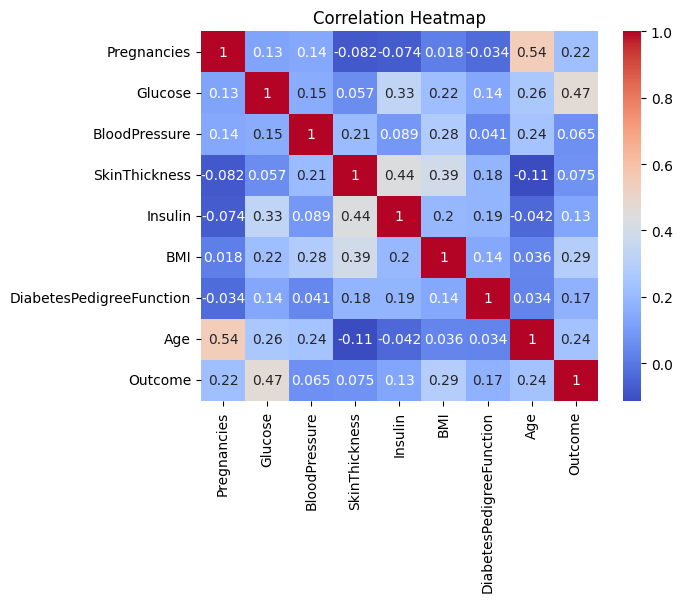

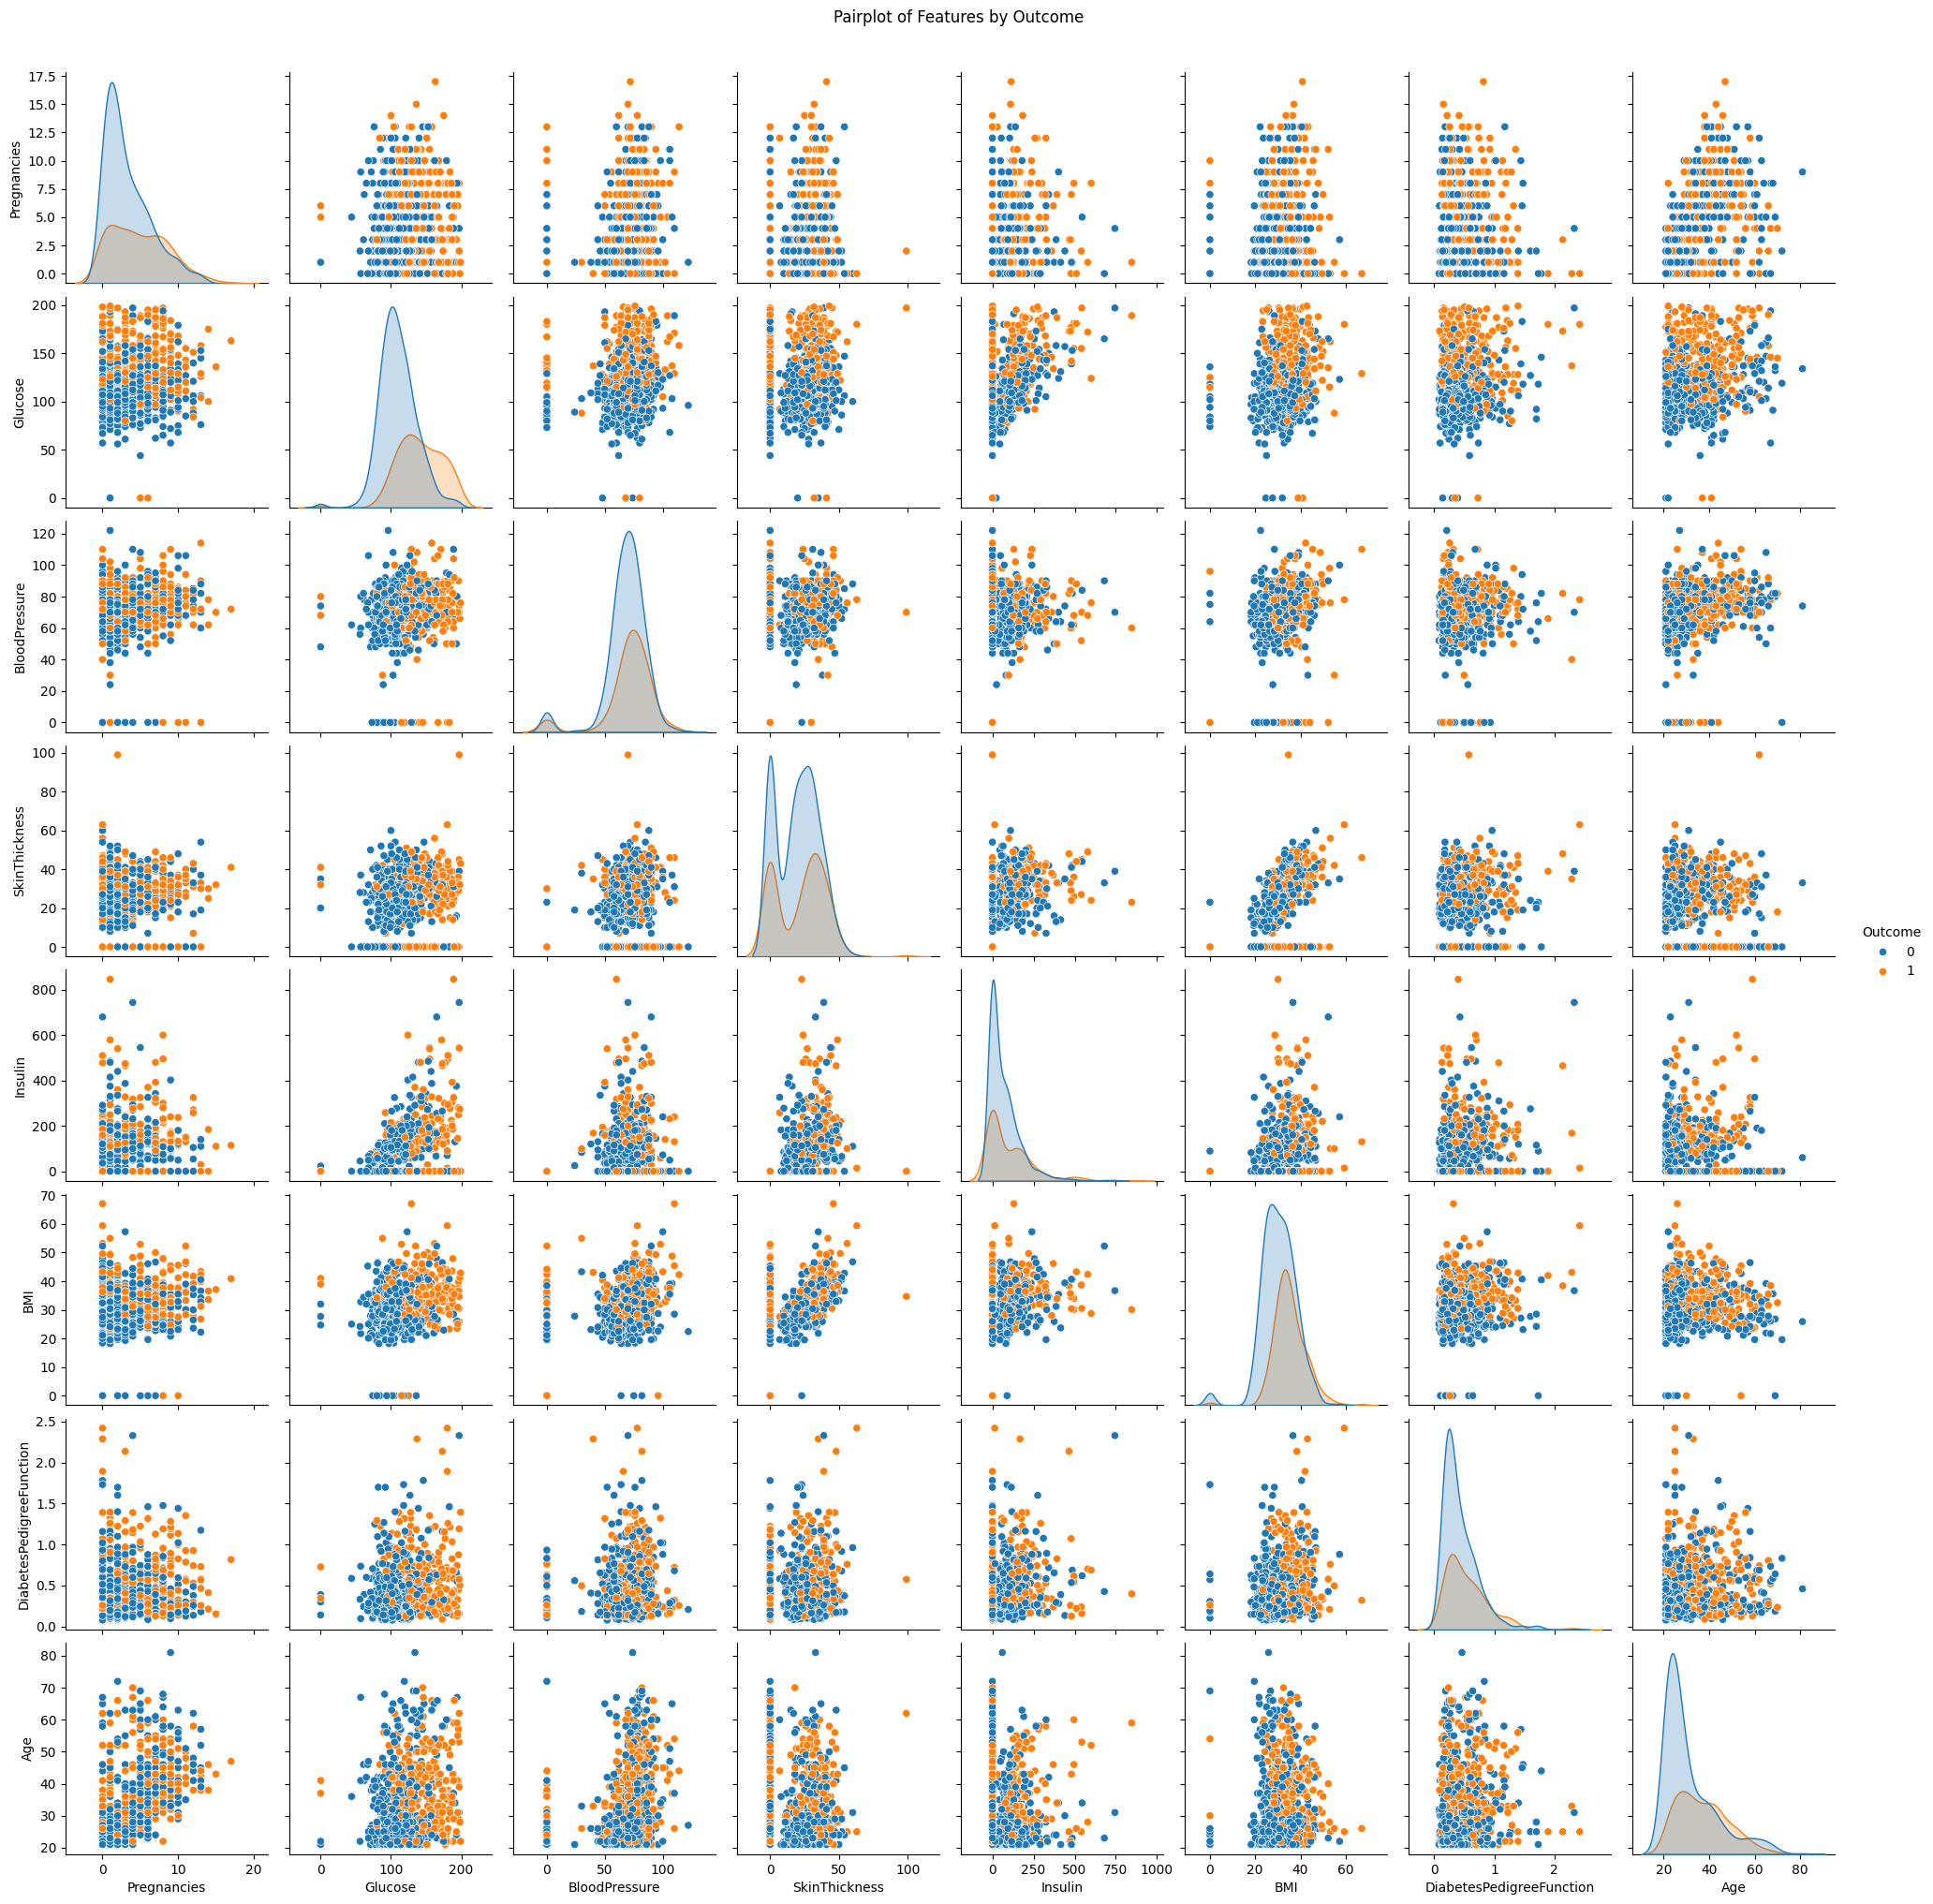

In [19]:
# 5. EDA - Basic Visualizations
sns.countplot(x='Outcome', data=df)
plt.title("Class Distribution")

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

sns.pairplot(df, hue='Outcome')
plt.suptitle("Pairplot of Features by Outcome", y=1.02)


In [10]:
# 6. Feature Selection
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [11]:
# 7. Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# 8. Build Decision Tree (Gini)
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [13]:
# 9. Evaluate Gini Model
y_pred_gini = clf_gini.predict(X_test)
print("\nAccuracy (Gini):", accuracy_score(y_test, y_pred_gini))
print("\nClassification Report (Gini):\n", classification_report(y_test, y_pred_gini))



Accuracy (Gini): 0.6948051948051948

Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.80      0.70      0.75        99
           1       0.56      0.69      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.72      0.69      0.70       154



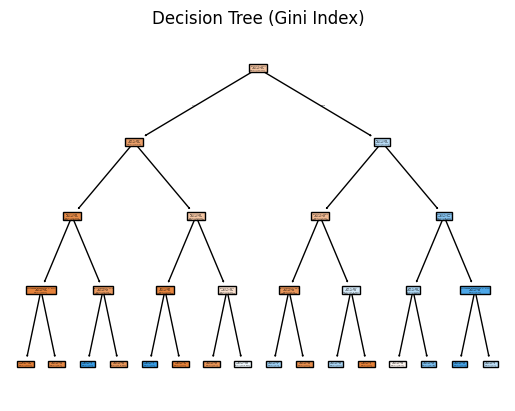

In [22]:
# 10. Visualize Decision Tree (Gini)
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.title("Decision Tree (Gini Index)")
plt.show()


In [15]:
# 11. Optimize: Use Entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

Text(0.5, 1.0, 'Decision Tree')

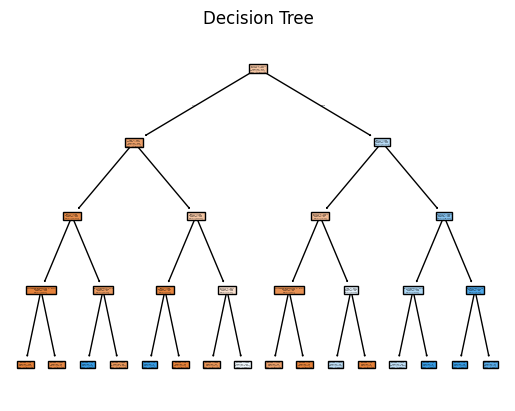

In [23]:
# 12. Visualize Decision Tree (Entropy)
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.title("Decision Tree")



Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.87      0.66      0.75        99
           1       0.57      0.82      0.67        55

    accuracy                           0.71       154
   macro avg       0.72      0.74      0.71       154
weighted avg       0.76      0.71      0.72       154



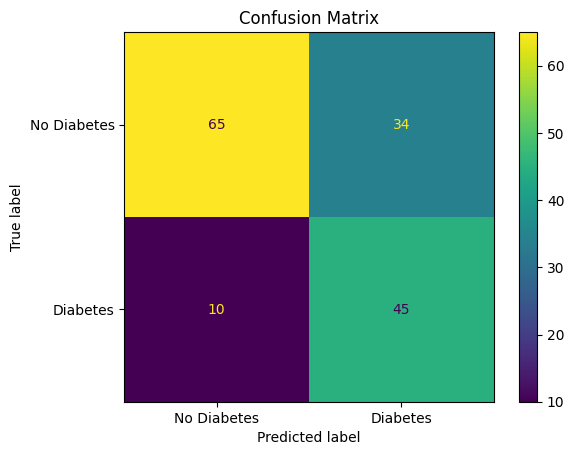

In [24]:
# 13. Confusion Matrix & Metrics
y_pred_entropy = clf_entropy.predict(X_test)
cm = confusion_matrix(y_test, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot()
plt.title("Confusion Matrix")

# Precision, Recall, F1-score
print("\nClassification Report (Entropy):\n", classification_report(y_test, y_pred_entropy))
